In [1]:
qasm_str = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[8];
creg c[8];
u3(pi/4,-pi,-pi) q[1];
cz q[0],q[1];
ry(pi/2) q[0];
ry(pi/4) q[1];
u3(1.7679655525118292,1.1945736265076672,-1.5096031886023131) q[2];
u3(pi/2,-pi,-0.9182996522682285) q[4];
cx q[4],q[2];
rx(1.219386317488504) q[4];
cx q[4],q[2];
u3(2.7485135499089113,-0.5108651322743936,2.7952601622872653) q[2];
u3(pi/2,-2.863330091182977,0) q[4];
cx q[5],q[0];
ry(-pi/2) q[0];
cx q[5],q[0];
rz(pi/2) q[5];
u3(0,1.567482162989629,1.567482162989629) q[6];
cx q[0],q[6];
rz(-3.134964325979259) q[6];
cx q[0],q[6];
u3(0.6913565616106289,-0.49515333409811424,1.1808477022010972) q[7];
"""

In [ ]:
from pytket.passes import FullPeepholeOptimise, DecomposeBoxes, GreedyPauliSimp, AutoRebase
from pytket.qasm import circuit_from_qasm_str, circuit_to_qasm_str
from pytket.circuit.display import get_circuit_renderer
from pytket import OpType
tket_circ = circuit_from_qasm_str(qasm_str)


renderer = get_circuit_renderer()
# renderer.render_circuit_jupyter(tket_circ)

# allowed_ops = {
#     # OpType.PhasedX,
#     # OpType.Measure, OpType.ZZMax,
#     # OpType.Tdg, OpType.T, OpType.Ry, OpType.Rx, OpType.Z, OpType.X,
#     # OpType.PauliExpBox, OpType.Rz, OpType.Y, OpType.S, OpType.Sdg,
#     # OpType.V, OpType.Vdg, OpType.SWAP, OpType.H, OpType.YYPhase,
#     # OpType.CY, OpType.XXPhase, OpType.CX, OpType.ZZPhase, OpType.CZ
# }
basis = {
    OpType.PhasedX,
    OpType.Rx, OpType.Ry, OpType.Rz, OpType.CZ}
AutoRebase(basis).apply(tket_circ)


# AutoRebase({OpType.Rx, OpType.Ry, OpType.Rz, OpType.CZ}).apply(tket_circ)

GreedyPauliSimp().apply(tket_circ)


# renderer.render_circuit_jupyter(tket_circ)

new_qasm_str = circuit_to_qasm_str(tket_circ)
print(new_qasm_str)

OPENQASM 2.0;
include "qelib1.inc";

qreg q[8];
creg c[8];
rz(0.5*pi) q[1];
rz(3.899722975945124*pi) q[2];
rz(2.7076961422038854*pi) q[4];
rz(0.9978901377927016*pi) q[6];
rz(0.2182632962677268*pi) q[7];
rx(0.25*pi) q[1];
rz(3.1197554049081866*pi) q[2];
rz(0.5*pi) q[4];
rz(1.0*pi) q[6];
rz(3.657612201420295*pi) q[7];
rz(3.5*pi) q[1];
rx(0.562760913796903*pi) q[2];
rx(0.5*pi) q[4];
rz(3.5*pi) q[6];
rx(0.22006562843869615*pi) q[7];
cz q[0],q[1];
rz(0.8802445950918136*pi) q[2];
rz(3.5*pi) q[4];
rx(0.5*pi) q[6];
rz(0.3423877985797048*pi) q[7];
ry(0.5*pi) q[0];
ry(0.25*pi) q[1];
rz(1.0*pi) q[2];
rz(0.5*pi) q[6];
rz(1.0*pi) q[0];
rz(3.5*pi) q[2];
rz(3.5*pi) q[0];
rx(0.5*pi) q[2];
rx(0.5*pi) q[0];
rz(0.5*pi) q[2];
rz(0.5*pi) q[0];
cz q[4],q[2];
cz q[5],q[0];
rz(1.0*pi) q[2];
rx(0.38814271993383737*pi) q[4];
rz(1.0*pi) q[0];
rz(3.5*pi) q[2];
rz(3.5*pi) q[0];
rx(0.5*pi) q[2];
rx(0.5*pi) q[0];
rz(0.5*pi) q[2];
rz(0.5*pi) q[0];
rz(1.0*pi) q[2];
ry(3.5*pi) q[0];
rz(3.5*pi) q[2];
rz(1.0*pi) q[0];
rx

In [12]:
from mqt import qcec
path_qasm_1 = "original.qasm"
path_qasm_2 = "transformed.qasm"

with open(path_qasm_1, 'w') as file:
    file.write(qasm_str)

with open(path_qasm_2, 'w') as file:
    file.write(new_qasm_str)


result = qcec.verify(
    str(path_qasm_1),
    str(path_qasm_2),
    transform_dynamic_circuit=True)
equivalence = str(result.equivalence)
print(equivalence)

equivalent_up_to_global_phase


In [ ]:
from qiskit.quantum_info import Operator
from qiskit.qasm2 import load, LEGACY_CUSTOM_INSTRUCTIONS

qc_start = load(path_qasm_1, custom_instructions=LEGACY_CUSTOM_INSTRUCTIONS)
qc_optimized = load(
    path_qasm_2, custom_instructions=LEGACY_CUSTOM_INSTRUCTIONS)

op_start = Operator(qc_start)
op_optimized = Operator(qc_optimized)

print("Start")
print(op_start.data)

print("Optimized")
print(op_optimized.data)

unitary_equiv = op_start.equiv(op_optimized)
print("Are the unitaries equivalent?", unitary_equiv)

Start
[[-1.83200053e-01+9.22837278e-01j  1.82814960e-17-5.54564535e-17j
   4.35523393e-17-1.01795884e-17j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 2.44786170e-19-7.38603426e-17j  1.33864401e-01-6.51671522e-01j
  -3.71548350e-18+1.80875182e-17j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 3.63613137e-17+2.60439079e-17j  0.00000000e+00+0.00000000e+00j
  -1.83200053e-01+9.22837278e-01j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  3.16719785e-17+4.90562647e-17j
   1.19393313e-17-1.79829903e-17j  4.75079678e-17+7.35843970e-17j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  1.68501117e-01+2.73305100e-01j
  -3.67169764e-17-1.01215662e-16j -1.6850

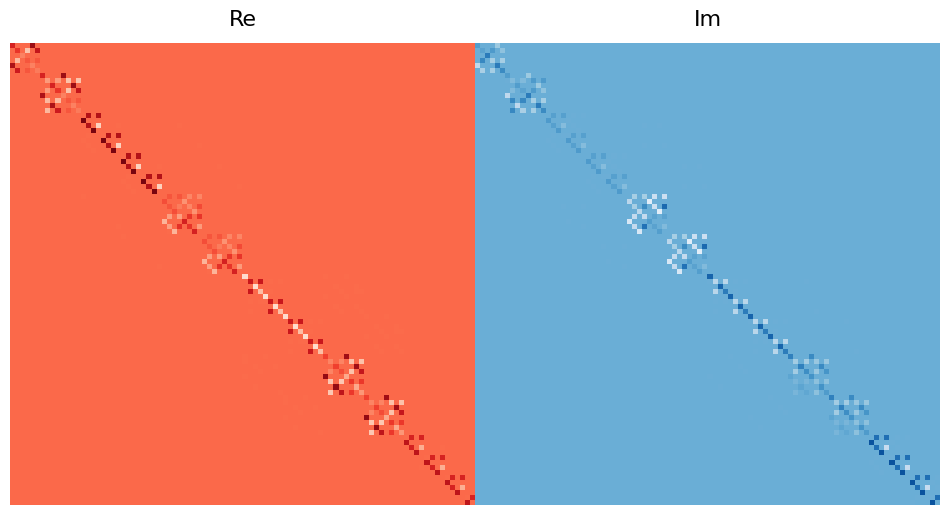

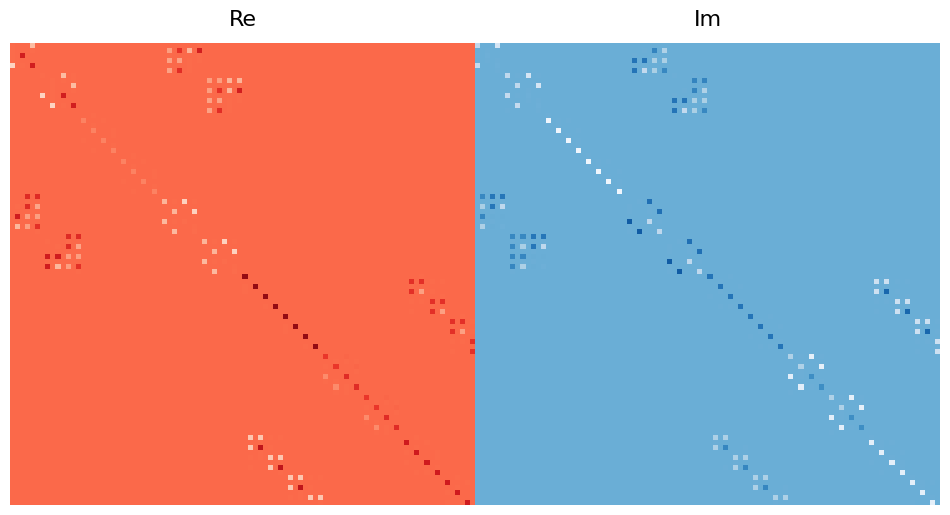

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def split_real_imag(matrix):
    return matrix.real, matrix.imag


real_start, imag_start = split_real_imag(op_start.data)
real_optimized, imag_optimized = split_real_imag(op_optimized.data)


def zoom_in_matrix(matrix, perc_zoom):
    n = matrix.shape[0]
    zoom = int(n * perc_zoom)
    return matrix[n//2 - zoom:n//2 + zoom, n//2 - zoom:n//2 + zoom]


ZOOM = 0.18
print("Warning: zooming in the matrix by a factor of", ZOOM)
real_start = zoom_in_matrix(real_start, ZOOM)
imag_start = zoom_in_matrix(imag_start, ZOOM)
real_optimized = zoom_in_matrix(real_optimized, ZOOM)
imag_optimized = zoom_in_matrix(imag_optimized, ZOOM)


def plot_combined_heatmaps(real_matrix, imag_matrix, filename):
    combined_matrix = np.hstack((real_matrix, imag_matrix))
    fig, ax = plt.subplots(figsize=(12, 6))
    vmin, vmax = -1, 1

    # Create a mask to apply different color maps
    mask = np.zeros_like(combined_matrix, dtype=bool)
    mask[:, :real_matrix.shape[1]] = True  # Left half (real part)

    # Plot the heatmap with different color maps
    sns.heatmap(combined_matrix, annot=False, fmt=".2f", cmap='Reds',
                cbar=False, ax=ax, vmin=vmin, vmax=vmax, mask=~mask)
    sns.heatmap(combined_matrix, annot=False, fmt=".2f", cmap='Blues',
                cbar=False, ax=ax, vmin=vmin, vmax=vmax, mask=mask)

    # Add titles
    ax.text(0.25, 1.05, 'Re', ha='center', va='center',
            transform=ax.transAxes, fontsize=16)
    ax.text(0.75, 1.05, 'Im', ha='center',
            va='center', transform=ax.transAxes, fontsize=16)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.savefig(filename, bbox_inches='tight')
    plt.show()


plot_combined_heatmaps(real_start, imag_start, "PT_1771_unitary_before.png")
plot_combined_heatmaps(real_optimized, imag_optimized,
                       "PT_1771_unitary_after.png")

In [3]:
from qiskit.qasm2 import load, LEGACY_CUSTOM_INSTRUCTIONS
from qiskit.quantum_info import Operator
from pytket import OpType
from pytket.circuit.display import get_circuit_renderer
from pytket.qasm import circuit_from_qasm_str, circuit_to_qasm_str
from pytket.passes import FullPeepholeOptimise, DecomposeBoxes, GreedyPauliSimp, AutoRebase
qasm_str = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[8];
creg c[8];
u3(pi/4,-pi,-pi) q[1];
cz q[0],q[1];
ry(pi/2) q[0];
ry(pi/4) q[1];
u3(1.7679655525118292,1.1945736265076672,-1.5096031886023131) q[2];
u3(pi/2,-pi,-0.9182996522682285) q[4];
cx q[4],q[2];
rx(1.219386317488504) q[4];
cx q[4],q[2];
u3(2.7485135499089113,-0.5108651322743936,2.7952601622872653) q[2];
u3(pi/2,-2.863330091182977,0) q[4];
cx q[5],q[0];
ry(-pi/2) q[0];
cx q[5],q[0];
rz(pi/2) q[5];
u3(0,1.567482162989629,1.567482162989629) q[6];
cx q[0],q[6];
rz(-3.134964325979259) q[6];
cx q[0],q[6];
u3(0.6913565616106289,-0.49515333409811424,1.1808477022010972) q[7];
"""

tket_circ = circuit_from_qasm_str(qasm_str)

basis = {
    OpType.PhasedX,  # REMOVE THIS LEADS TO -> THE CIRCUIT IS EQUIVALENT
    OpType.Rx, OpType.Ry, OpType.Rz, OpType.CZ}
AutoRebase(basis).apply(tket_circ)

# EITHER THIS
# AutoRebase({OpType.Rx, OpType.Ry, OpType.Rz, OpType.CZ}).apply(tket_circ)
# IF THIS IS ON --> THE CIRCUIT IS EQUIVALENT

# OR THIS SHOULD BE ON
GreedyPauliSimp().apply(tket_circ)
# IF THIS IS ON --> THE CIRCUIT IS EQUIVALENT
new_qasm_str = circuit_to_qasm_str(tket_circ)
print(new_qasm_str)

# OUTPUT
# OPENQASM 2.0;
# include "qelib1.inc";
# qreg q[8];
# creg c[8];
# rz(0.5*pi) q[1];
# rz(3.899722975945124*pi) q[2];
# rz(2.7076961422038854*pi) q[4];
# rz(0.9978901377927016*pi) q[6];
# rz(0.2182632962677268*pi) q[7];
# rx(0.25*pi) q[1];
# rz(3.1197554049081866*pi) q[2];
# rz(0.5*pi) q[4];
# rz(1.0*pi) q[6];
# rz(3.657612201420295*pi) q[7];
# rz(3.5*pi) q[1];
# rx(0.562760913796903*pi) q[2];
# rx(0.5*pi) q[4];
# rz(3.5*pi) q[6];
# rx(0.22006562843869615*pi) q[7];
# cz q[0],q[1];
# rz(0.8802445950918136*pi) q[2];
# rz(3.5*pi) q[4];
# rx(0.5*pi) q[6];
# rz(0.3423877985797048*pi) q[7];
# ry(0.5*pi) q[0];
# ry(0.25*pi) q[1];
# rz(1.0*pi) q[2];
# rz(0.5*pi) q[6];
# rz(1.0*pi) q[0];
# rz(3.5*pi) q[2];
# rz(3.5*pi) q[0];
# rx(0.5*pi) q[2];
# rx(0.5*pi) q[0];
# rz(0.5*pi) q[2];
# rz(0.5*pi) q[0];
# cz q[4],q[2];
# cz q[5],q[0];
# rz(1.0*pi) q[2];
# rx(0.38814271993383737*pi) q[4];
# rz(1.0*pi) q[0];
# rz(3.5*pi) q[2];
# rz(3.5*pi) q[0];
# rx(0.5*pi) q[2];
# rx(0.5*pi) q[0];
# rz(0.5*pi) q[2];
# rz(0.5*pi) q[0];
# rz(1.0*pi) q[2];
# ry(3.5*pi) q[0];
# rz(3.5*pi) q[2];
# rz(1.0*pi) q[0];
# rx(0.5*pi) q[2];
# rz(3.5*pi) q[0];
# rz(0.5*pi) q[2];
# rx(0.5*pi) q[0];
# cz q[4],q[2];
# rz(0.5*pi) q[0];
# rz(1.0*pi) q[2];
# rz(3.0885737245689233*pi) q[4];
# cz q[5],q[0];
# rz(3.5*pi) q[2];
# rz(0.41142627543107646*pi) q[4];
# rz(1.0*pi) q[0];
# rx(0.5*pi) q[2];
# rx(0.5*pi) q[4];
# rz(0.5*pi) q[5];
# rz(3.5*pi) q[0];
# rz(0.5*pi) q[2];
# rz(3.5885737245689233*pi) q[4];
# rx(0.5*pi) q[0];
# rz(0.7271455220022143*pi) q[2];
# rz(0.5*pi) q[0];
# rz(3.6626134221095294*pi) q[2];
# cz q[0],q[6];
# rx(0.8748790352461121*pi) q[2];
# rz(0.3373865778904706*pi) q[2];
# rz(1.0*pi) q[6];
# rz(3.5*pi) q[6];
# rx(0.5*pi) q[6];
# rz(0.5*pi) q[6];
# rz(3.002109862207298*pi) q[6];
# rz(1.0*pi) q[6];
# rz(3.5*pi) q[6];
# rx(0.5*pi) q[6];
# rz(0.5*pi) q[6];
# cz q[0],q[6];
# rz(1.0*pi) q[6];
# rz(3.5*pi) q[6];
# rx(0.5*pi) q[6];
# rz(0.5*pi) q[6];


path_qasm_1 = "original.qasm"
path_qasm_2 = "transformed.qasm"

with open(path_qasm_1, 'w') as file:
    file.write(qasm_str)
with open(path_qasm_2, 'w') as file:
    file.write(new_qasm_str)

qc_start = load(path_qasm_1, custom_instructions=LEGACY_CUSTOM_INSTRUCTIONS)
qc_optimized = load(
    path_qasm_2, custom_instructions=LEGACY_CUSTOM_INSTRUCTIONS)

op_start = Operator(qc_start)
op_optimized = Operator(qc_optimized)

print("Start")
print(op_start.data)

print("Optimized")
print(op_optimized.data)

unitary_equiv = op_start.equiv(op_optimized)
print("Are the unitaries equivalent?", unitary_equiv)
# OUTPUT
# Are the unitaries equivalent? False

OPENQASM 2.0;
include "qelib1.inc";

gate v vq0 {
u3(0.5*pi,1.5*pi,0.5*pi) vq0;
}
gate vdg vdgq0 {
u3(3.5*pi,1.5*pi,0.5*pi) vdgq0;
}
qreg q[8];
creg c[8];
cz q[0],q[1];
u3(0.562760913796903*pi,0.38024459509181363*pi,3.51947838085331*pi) q[2];
u3(0.0*pi,-0.5*pi,2.796269866772809*pi) q[4];
cx q[6],q[5];
u3(0.22006562843869615*pi,-0.1576122014202952*pi,4.375875497688022*pi) q[7];
cx q[0],q[5];
ry(0.25*pi) q[1];
cz q[2],q[4];
u3(0.0*pi,-0.5*pi,1.4978901377927016*pi) q[6];
v q[0];
rx(3.611857280066163*pi) q[2];
u3(0.0*pi,-0.5*pi,3.502109862207298*pi) q[5];
cy q[0],q[1];
rz(0.38975894411174367*pi) q[2];
cx q[6],q[5];
vdg q[0];
v q[1];
cz q[2],q[4];
rz(3.75*pi) q[0];
rx(0.8748790352461121*pi) q[2];
s q[4];
cy q[1],q[0];
rz(0.3373865778904706*pi) q[2];
z q[4];
cy q[5],q[0];
vdg q[1];
s q[0];
s q[5];
z q[0];

Start
[[-1.83200053e-01+9.22837278e-01j  1.82814960e-17-5.54564535e-17j
   4.35523393e-17-1.01795884e-17j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e